<a href="https://colab.research.google.com/github/ash260498/-Datascience/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Aswathi Rajesh


# **Project Summary -**

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn. We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences. The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.The objective of this project is to analyze and cluster TV shows and movies available on Netflix using Python. The goal is to group similar content together based on various features and attributes, allowing for better understanding of Netflix's content library and potential recommendations for users.

# **GitHub Link -**

https://github.com/ash260498/-Datascience/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb

# **Problem Statement**


**Netflix has a vast library of movies and TV shows, and it can be challenging for users to navigate and discover content that aligns with their preferences. The aim of this project is to develop a clustering solution that can group similar movies and TV shows together based on various attributes such as genre, release year, duration, cast members, directors, and more. By clustering the content, we can provide users with a more organized and personalized viewing experience.The goal of this project is to develop an efficient clustering solution that organizes Netflix's content library, provides insights into the content, and offers personalized recommendations to users. This will improve the user experience by facilitating content discovery and enhancing the relevance of recommendations based on individual preferences.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [332]:
#import libraries
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [333]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [334]:
# Load Dataset
#Importing data by reading csv file
file_path = '/content/drive/MyDrive/AlmaBetter/UnsupervisedML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(file_path)


### Dataset First View

In [335]:
# Dataset First Look
original_df = pd.read_csv(file_path,index_col='show_id')
df = original_df.copy()
# top 5 rows
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [336]:
# Dataset Rows & Columns count
# dataframe shape
num_rows = df.shape[0]
num_columns=df.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns:{num_columns}")

Number of rows: 7787
Number of columns:11


### Dataset Information

In [337]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


In [338]:
df.nunique()


type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

#### Duplicate Values

In [339]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    7787
dtype: int64

#### Missing Values/Null Values

In [340]:
# Missing Values/Null Values Count
null_value_counts = df.isnull().sum()
print(null_value_counts)

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: ylabel='show_id'>

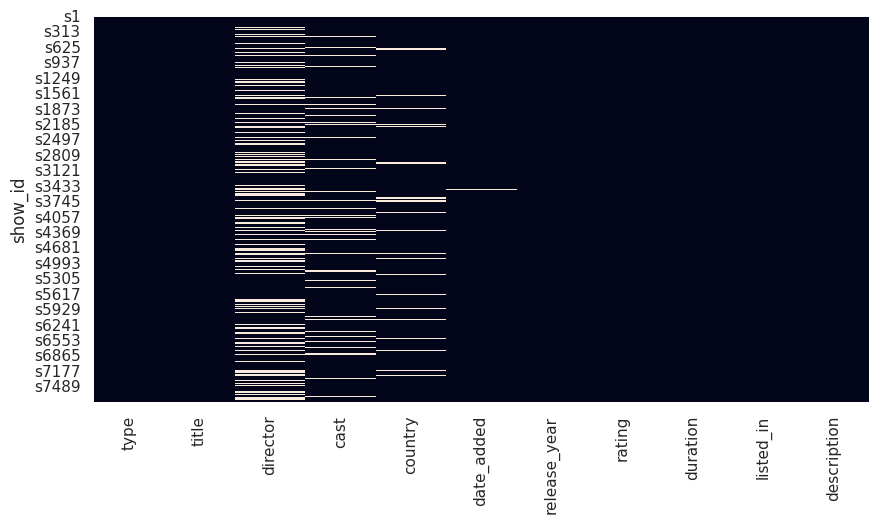

In [341]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.There are about 7787 row and 11 coulmns in the dataset.The various fields are show_id , type,title, director,cast, country , date_added,release_year,rating, duration,listed_in, description.Main libraries used are pandas for data manipulation and aggregation.Matplotlib and seaborn for visualization and behaviour with respect to target variable.And Numpy for computationaly efficient operations.

## ***2. Understanding Your Variables***

In [342]:
# Dataset Columns
# Check Unique Values for each variable.
for column in df.columns:
  #Get unique values for the current columns
  unique_values=df[column].unique()
  print(f"Unique values for column'{column}:")
  print(unique_values)

Unique values for column'type:
['TV Show' 'Movie']
Unique values for column'title:
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
Unique values for column'director:
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
Unique values for column'cast:
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
Unique values for column'country:
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'E

In [343]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

These variables provide details about the content, genre, cast, crew, release year, duration, and other relevant characteristics of the media.It includes both categorical and numerical features. Categorical variables describe qualitative attributes, such as genre (e.g., action, comedy, drama) or target audience (e.g., kids, adults). Numerical variables, on the other hand, provide quantitative information, such as the release year, duration in minutes, or average user ratings.This clustering can help in various applications, such as content recommendation, user segmentation, or content analysis for business purposes.

### Check Unique Values for each variable.

In [344]:
# Check Unique Values for each variable.
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [345]:
# Write your code to make your dataset analysis ready.
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [346]:
yearly_movies.head()

2021     19
2020    457
2019    414
2018    387
2017    268
Name: release_year, dtype: int64

In [347]:
#Finding unique values present in the release year
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [348]:
#checking the datatype present in the release year
type(df['release_year'][0])

numpy.int64

In [349]:
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1121,1012,996,882,868,541,334,267,219,173,...,2,2,2,2,2,1,1,1,1,1


<Axes: >

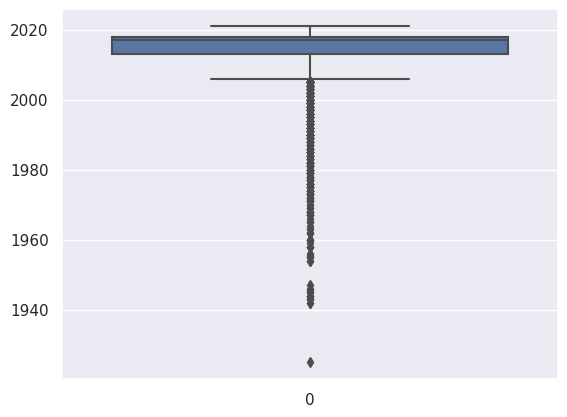

In [350]:
#checking outliers of release column
sns.boxplot(df.release_year)

In [351]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [352]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [353]:
release_year_outliers

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
s95,Movie,28 Days,Betty Thomas,"Sandra Bullock, Viggo Mortensen, Dominic West,...",United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...,...
s7746,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
s7750,TV Show,Yu-Gi-Oh!,NaN,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...


In [354]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

In [355]:
df.release_year.describe()

count    7787.000000
mean     2016.257594
std         2.727605
min      2009.000000
25%      2013.932580
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [356]:
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))
df.release_year = df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


In [357]:
df.title.nunique()

7787

In [358]:
#checking number of unique values present in the country
df.country.nunique()

681

In [359]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2555,923,397,226,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


In [360]:
#checking number of nan values
df.country.isna().sum()

507

In [361]:
#mode value of country column
df.country.mode()[0]

'United States'

In [362]:
df.country[df.country.isna()] = df.country.mode()[0]

In [363]:
df.country[df.country.isna()]

Series([], Name: country, dtype: object)

In [364]:
df.country.isna().sum()

0

In [365]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [366]:
production_country[:5]

[('', 4, 0, 4),
 ('Kazakhstan', 1, 0, 1),
 ('Dominican Republic', 1, 0, 1),
 ('Bermuda', 1, 0, 1),
 ('Montenegro', 1, 0, 1)]

In [367]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies'])
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [368]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3804,1143,2661
1,India,990,75,915
2,United Kingdom,723,256,467
3,Canada,412,126,286
4,France,349,84,265


In [369]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3804,990,723,412,349
TV-Shows,1143,75,256,126,84
Movies,2661,915,467,286,265


In [370]:
#checking nan values for duration
df.duration.isna().sum()

0

In [371]:
#checking the datatype
df.duration.isna().sum()

0

In [372]:
df.duration.nunique()

216

In [373]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,9 min,182 min,224 min,233 min,196 min,191 min
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [374]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [375]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

"4 Seasons" :
4 Seasons = (45) or 20 episodes
Each episode avg. time is 55 mins.
Total time (in minutes. ) = (5520) min
= 1100 mins

In [376]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert
      # season to total min
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list

In [377]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,9 min,182 min,224 min,233 min,196 min,191 min
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [378]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,9 min,182 min,224 min,233 min,196 min,191 min
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [379]:
#Unique values present in the listed in
df.listed_in.nunique()

492

In [380]:
#checking nan values in the listed in
df.listed_in.isna().sum()

0

In [381]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Anime Series, Crime TV Shows, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,205,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [382]:
#making categories
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [383]:
len(categories)

17071

In [384]:
len(set(categories))

42

In [385]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [386]:
category_wise_count

{'Comedies': 1471,
 'Spanish-Language TV Shows': 147,
 'Sports Movies': 196,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'TV Mysteries': 90,
 'Crime TV Shows': 427,
 'Classic Movies': 103,
 'Horror Movies': 312,
 'TV Action & Adventure': 150,
 'Cult Movies': 59,
 'TV Thrillers': 50,
 'TV Shows': 12,
 'Documentaries': 786,
 'TV Dramas': 704,
 'Stand-Up Comedy': 329,
 'Music & Musicals': 321,
 'Teen TV Shows': 60,
 'Anime Features': 57,
 'Anime Series': 148,
 'Classic & Cult TV': 27,
 'Korean TV Shows': 150,
 'Thrillers': 491,
 'International Movies': 2437,
 'Action & Adventure': 721,
 "Kids' TV": 414,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'Docuseries': 353,
 'International TV Shows': 1199,
 'Children & Family Movies': 532,
 'TV Horror': 69,
 'Reality TV': 222,
 'Stand-Up Comedy & Talk Shows': 52,
 'British TV Shows': 232,
 'TV Sci-Fi & Fantasy': 76,
 'LGBTQ Movies': 90,
 'Dramas': 2106,
 'Science & Nature TV': 85,
 'Movies': 56,
 'Faith & Spirituality': 57,
 'T

In [387]:
#sorting category wise count by value
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 27),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

In [388]:
#Top 5 least occured category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 27),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

In [389]:
#Top 5 mostoccured category
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1199),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [390]:
 #Top 10 most occured category
 top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [391]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 704),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1199),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [392]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [393]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [394]:
top_10_most_occurred_category_count

[531, 532, 673, 704, 721, 786, 1199, 1471, 2106, 2437]

In [395]:
#datatype of listed values
type(df.listed_in.iloc[0])

str

In [396]:
(df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [397]:
(df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [398]:
len((df.listed_in.iloc[0]).split(","))

3

In [399]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [400]:
df['no_of_category'] = no_of_category

In [401]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
show_id,,
s1,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
s2,"Dramas, International Movies",2
s3,"Horror Movies, International Movies",2
s4,"Action & Adventure, Independent Movies, Sci-Fi...",3
s5,Dramas,1


In [402]:
df.date_added.head(3)

show_id
s1      August 14, 2020
s2    December 23, 2016
s3    December 20, 2018
Name: date_added, dtype: object

In [403]:
df['date_added_month'] = df['date_added'].astype(str).apply(lambda x: x.split(" ")[0])
df[['date_added', 'date_added_month']].head()

,date_added,date_added_month
show_id,,
s1,"August 14, 2020",August
s2,"December 23, 2016",December
s3,"December 20, 2018",December
s4,"November 16, 2017",November
s5,"January 1, 2020",January


In [404]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [405]:
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

In [406]:
df.date_added_month.value_counts().to_frame().T

,December,October,January,November,March,September,August,April,July,June,May,February,,nan
date_added_month,817,780,746,730,661,614,612,596,592,538,537,466,88,10


In [407]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [408]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [409]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
show_id,,,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


In [410]:
df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [411]:
First_des = df.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

### What all manipulations have you done and insights you found?

We have figured out production growth based on content and release year.And also unique values present in the release year.As we have seen earlier before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values(release_year less than 2009) as outliers.Therefore replacing ouliers with mean values.We dont have any release year greater than 2018.There are **42 unique categories**  present & in this dataset **all the categories occured in total 17051 times**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

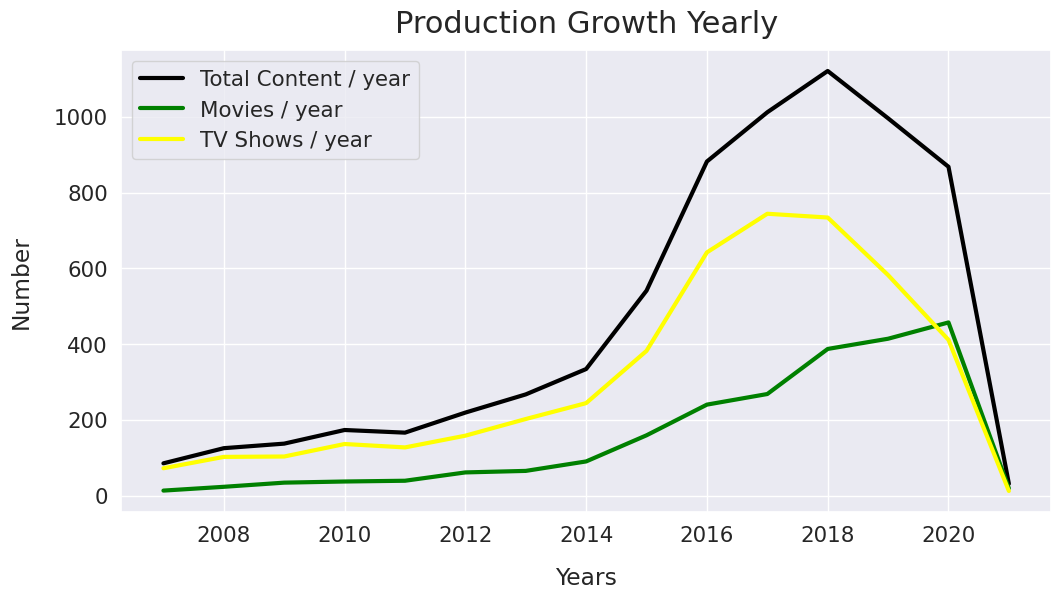

In [412]:
# Chart - 1 visualization code
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=3, color='black',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=3, color='green',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=3, color='yellow',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

Using a line graph for production growth yearly provides a visual representation of the trend and changes in production over time. It helps in understanding the trajectory of growth, identifying patterns, and analyzing the overall performance of the production process.

##### 2. What is/are the insight(s) found from the chart?

The overall trend of the line can indicate whether production has been increasing, decreasing, or remaining relatively stable over the years. A rising line suggests.The line graph can show both long-term and short-term fluctuations in production. Long-term trends may highlight broader economic or industry factors affecting production growth, while short-term fluctuations may be influenced by more immediate factors like market demand or supply chain disruptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing Netflix movies and TV shows clustering can potentially have a positive business impact. Here are a few examples:
Content Recommendation:
Market Segmentation:
Content Acquisition and Production Strategy:

#### Chart - 2

<Axes: >

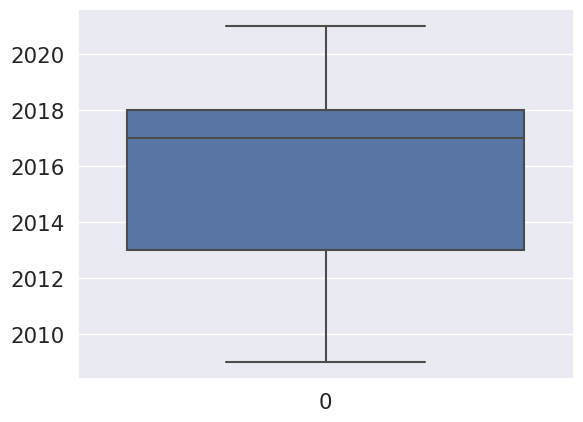

In [413]:
# Chart - 2 visualization code
sns.boxplot(df.release_year)

##### 1. Why did you pick the specific chart?

The "x" parameter represents the clustering variable, and the "y" parameter represents the release year. This visualization allows you to compare the distribution of release years across different clusters.

##### 2. What is/are the insight(s) found from the chart?

A box plot allows for easy comparison of the distribution of a variable across different release years. It provides a visual representation of the median, quartiles, and potential outliers for each year, enabling comparisons and identification of any significant differences or similarities between the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be valuable in understanding the dynamics of Netflix movies and TV shows and identifying any notable patterns or changes over time.

#### Chart - 3

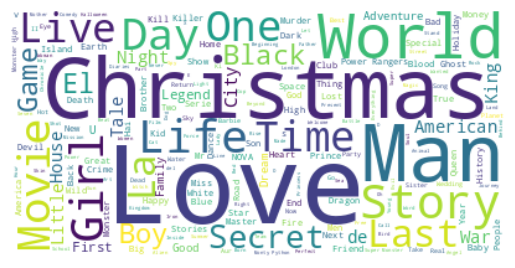

In [414]:
# Chart - 3 visualization code
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is a visualization technique that displays words from a text dataset, with the size of each word representing its frequency or importance within the text. In the context of Netflix movies and TV shows clustering, a word cloud can be used to gain insights into the most common words or terms associated with the content.

##### 2. What is/are the insight(s) found from the chart?

The word cloud can reveal the most prevalent genres or themes in the Netflix dataset. The larger the word appears in the cloud, the more frequently it occurs in the text. This information can be valuable for understanding the content landscape and identifying the dominant genres or themes that resonate with the audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

you can quickly grasp the overall content landscape, identify popular genres or themes, discover unique terms, and support content curation and recommendation systems. These insights can assist in content strategy, audience targeting, and enhancing user experiences on the Netflix platform.

#### Chart - 4

<Axes: xlabel='country'>

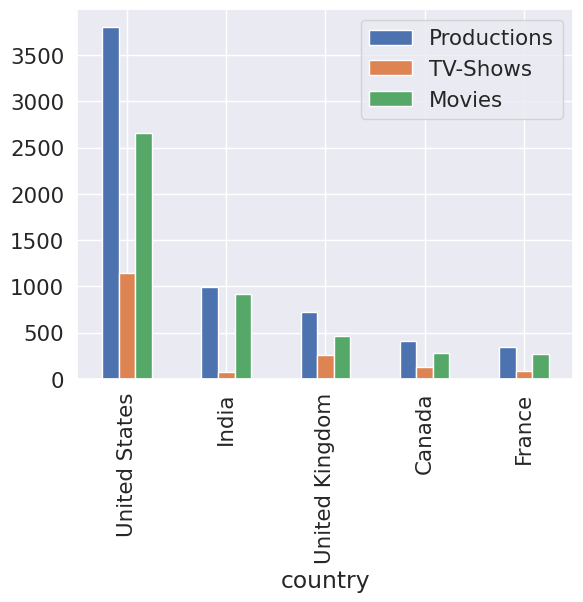

In [415]:
# Chart - 4 visualization code
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

##### 1. Why did you pick the specific chart?

A bar plot is used to visualize categorical data and compare the frequencies or counts of different categories. In the context of Netflix movies and TV shows clustering, a bar plot can provide insights into the distribution of production types (TV shows vs. movies) and their respective frequencies.

##### 2. What is/are the insight(s) found from the chart?

A bar plot allows for a clear visual comparison between the number of TV shows and movies in the dataset. The height of the bars represents the frequency or count of each production type, making it easy to compare the relative prevalence of TV shows and movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can inform content strategy, content acquisition decisions, and help ensure a balanced and diverse content library that aligns with viewer preferences.

#### Chart - 5

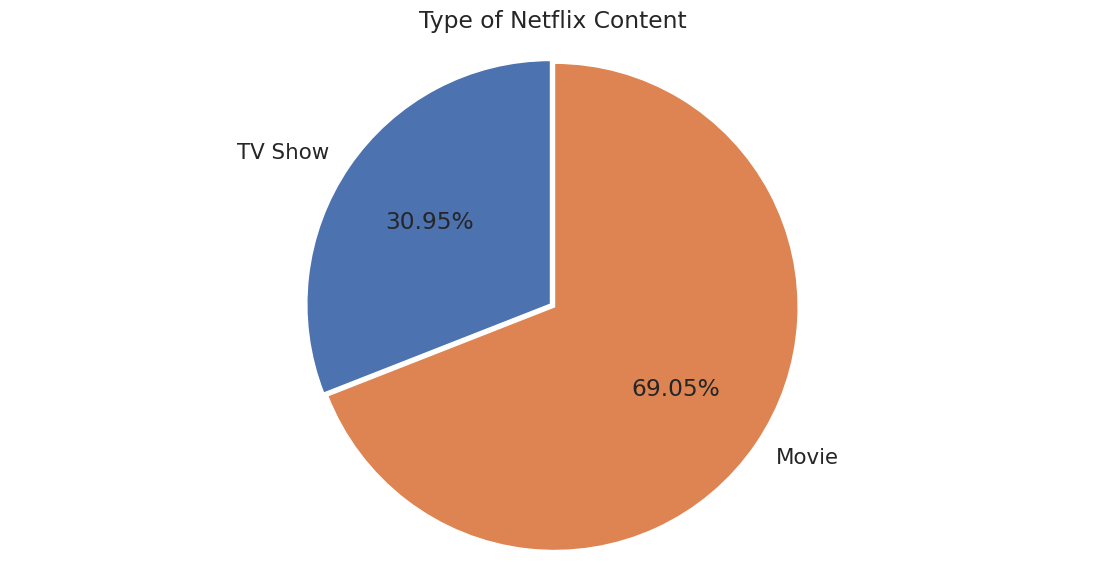

In [416]:
# Chart - 5 visualization code
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to visualize the composition or distribution of categorical data as a proportion of a whole. In the context of Netflix content, a pie chart can be used to represent the different types of content, such as movies and TV shows, and their respective proportions within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The pie chart provides a visual representation of the distribution of content types in the Netflix dataset. It helps in understanding the proportion of movies and TV shows, identifying which type is more prevalent.

The dominant content type can be easily identified by the largest slice in the pie chart. This insight reveals the primary focus or emphasis within the Netflix content library.

If there is a significant difference in the proportions of content types, it suggests an imbalance in the content library. This insight can guide content acquisition or production decisions to ensure a diverse and balanced offering for viewers.

Strategic Decision-making: The pie chart assists in making strategic decisions related to content acquisition, investment, or marketing efforts based on the proportions and dominance of content types. It helps align business strategies with the preferences and demand for specific content types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps understanding the distribution, dominance, and strategic implications of content types within the Netflix dataset.

#### Chart - 6

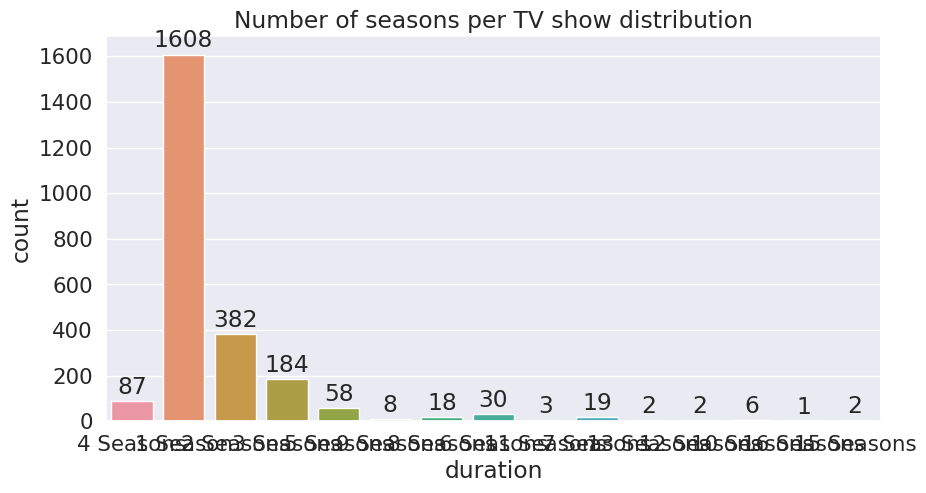

In [417]:
# Chart - 6 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

A bar graph is used to visually represent the distribution of categorical data, making it suitable for analyzing the number of seasons in TV shows and gaining insights

##### 2. What is/are the insight(s) found from the chart?

A bar graph provides a clear visualization of the frequency distribution of the number of seasons in TV shows. Each bar represents a specific number of seasons, and the height of the bar corresponds to the frequency or count of TV shows having that specific number of seasons. This helps in understanding the distribution pattern and identifying any prevalent or common number of seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The tallest bar(s) in the graph indicate the most common or prevalent number of seasons among TV shows. This insight helps in understanding the industry norm, viewer preferences, or production trends regarding TV show durations.

#### Chart - 7

In [418]:
# Chart - 7 visualization code
#Analysis on the duration of TV shows
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

Text(0.5, 1.0, 'Movie duration distribution')

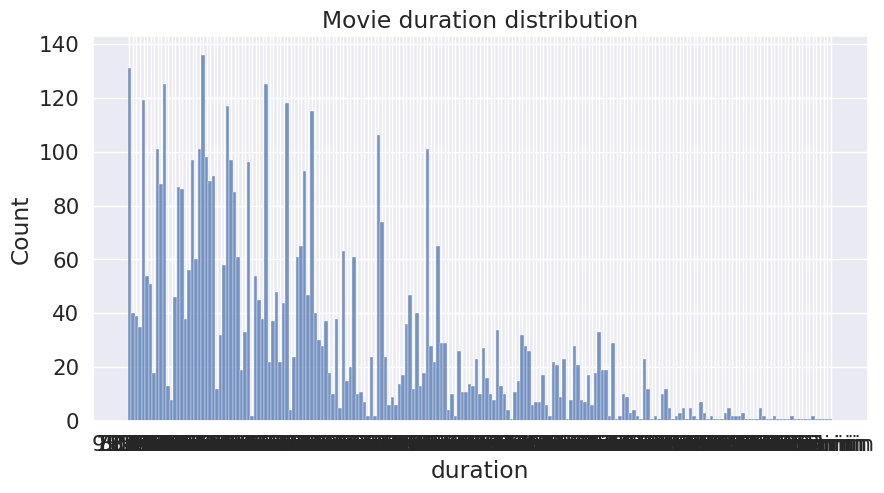

In [419]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

A bar graph is used to visualize the distribution of a categorical variable, such as the number of seasons for TV shows, by representing the categories as bars and their corresponding frequencies or counts on the y-axis

##### 2. What is/are the insight(s) found from the chart?

The bar graph can highlight the most common or dominant number of seasons for TV shows. The tallest bars in the graph represent the season lengths with the highest frequencies, indicating the prevailing pattern or trend in TV show durations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar graph reveals the most popular or common season lengths for TV shows. It helps identify the preferred duration of TV show seasons among viewers.
The bar graph visualizes the distribution of TV show durations across different season lengths. It allows for an understanding of the frequency and distribution of TV shows with specific season lengths.

#### Chart - 8

<Figure size 1600x800 with 0 Axes>

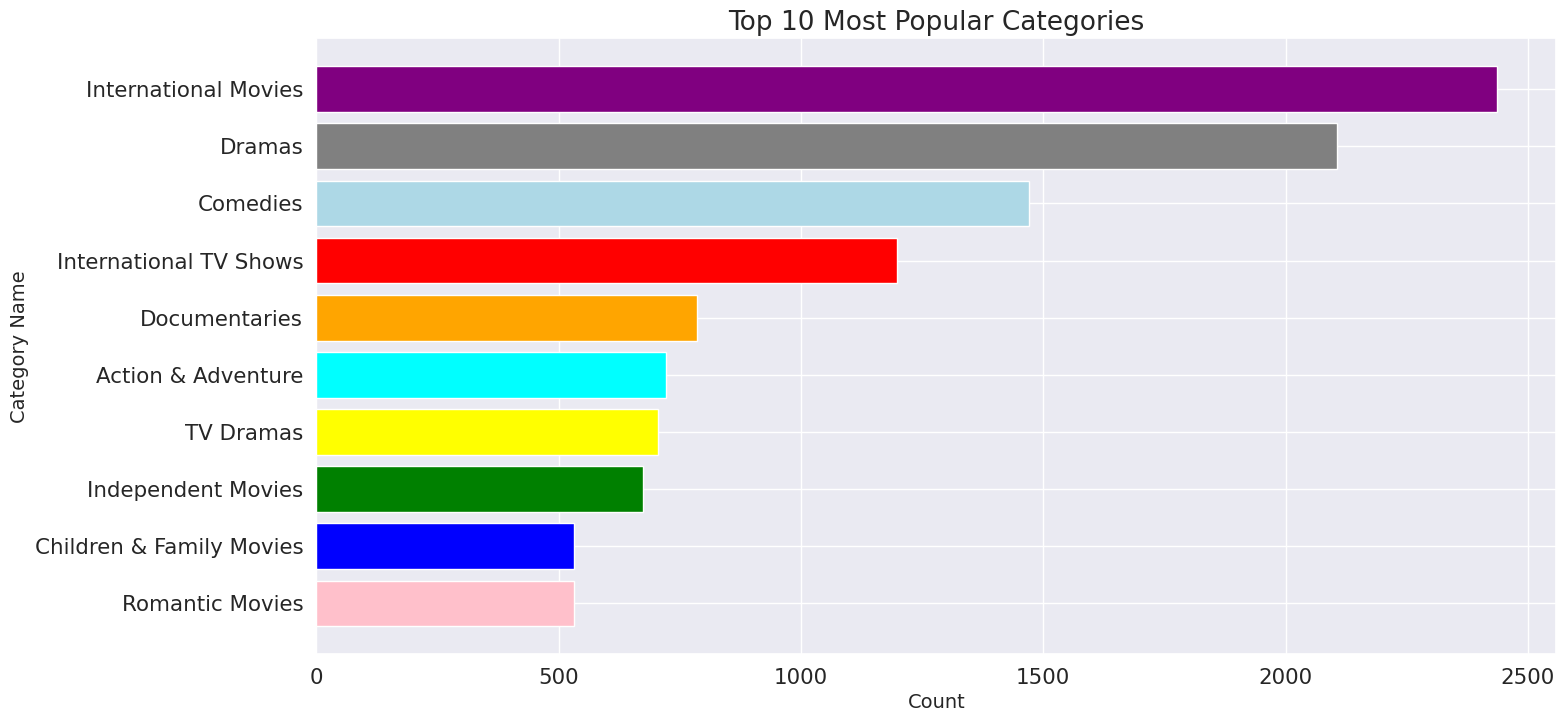

<Figure size 1600x800 with 0 Axes>

In [420]:
# Chart - 8 visualization code
plt.figure( figsize = (16,8))
color=['pink', 'blue', 'green', 'yellow', 'cyan' , "orange" ,'red', 'lightblue', 'grey', 'purple']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

##### 1. Why did you pick the specific chart?

A bar graph is used to visualize and compare data across different categories. In the context of analyzing the top 10 most popular categories in Netflix movies and TV shows, a bar graph can provide insights into the relative popularity of these categories and facilitate comparisons between them.

##### 2. What is/are the insight(s) found from the chart?

A bar graph allows you to rank the categories based on their popularity. The length of each bar represents the frequency or count of movies or TV shows within each category, enabling a clear visualization of the popularity hierarchy among the top 10 categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Popularity of Categories: The bar graph provides insights into the popularity of different categories within the top 10. It helps identify the most popular categories among Netflix viewers, indicating their preferences and interests.

Dominant Categories: The categories with the tallest bars represent the most dominant or popular genres within the top 10. These categories may attract a significant portion of the viewership and can serve as focal points for content curation and recommendation.

#### Chart - 9

In [421]:
# Chart - 9 visualization code
df.no_of_category.unique()

array([3, 2, 1])

In [422]:
df.no_of_category.value_counts()

3    3298
2    2688
1    1801
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

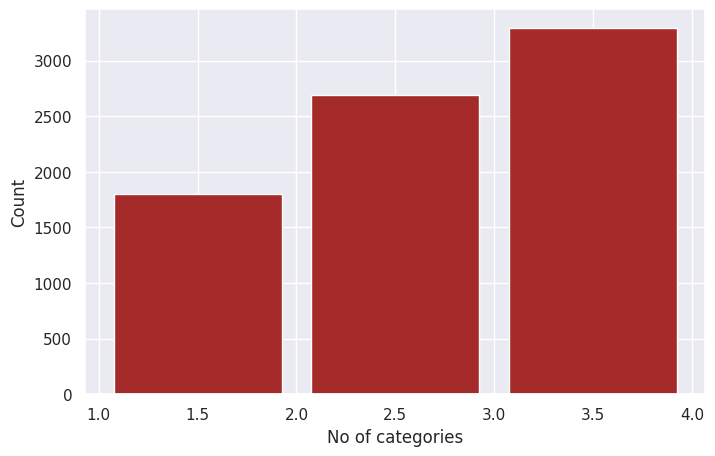

In [423]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='brown')
plt.xlabel("No of categories")
plt.ylabel("Count")

##### 1. Why did you pick the specific chart?

A bar graph is used to visualize and compare the frequencies or counts of different categories or groups. When analyzing the number of categories, a bar graph can provide insights into the distribution and composition of categories, allowing for easy comparison and identification of patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

Visualizing Category Distribution: A bar graph provides a clear visual representation of the distribution of categories. Each category is represented by a bar, with the height of the bar indicating the frequency or count of occurrences for that category. This visual representation allows for easy identification of the most common or prevalent categories.

Comparing Category Frequencies: The bar graph enables a straightforward comparison between the frequencies of different categories. By observing the heights of the bars, you can quickly identify which categories have higher or lower frequencies. This comparison can help identify dominant or popular categories and those that are less common.

Identifying Patterns or Trends: By analyzing the bar graph, you can identify any patterns or trends in the distribution of categories. For example, you may observe clusters of categories with similar frequencies or categories that stand out as outliers. These insights can provide valuable information about the nature of the dataset and the occurrence of certain categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Category Distribution: The bar graph provides a visual representation of the distribution of categories. It helps in understanding the frequencies or counts of different categories and how they are distributed within the dataset.

Dominant Categories: The tallest bars in the graph represent the most prevalent categories. These dominant categories can be easily identified and provide insights into the most frequently occurring or popular categories.

Varied Frequencies: The varying heights of the bars indicate different frequencies or counts of categories. By observing the differences in frequencies, you can identify categories that are more or less common and understand the diversity or concentration of categories within the dataset.

#### Chart - 10

Text(0, 0.5, 'Count')

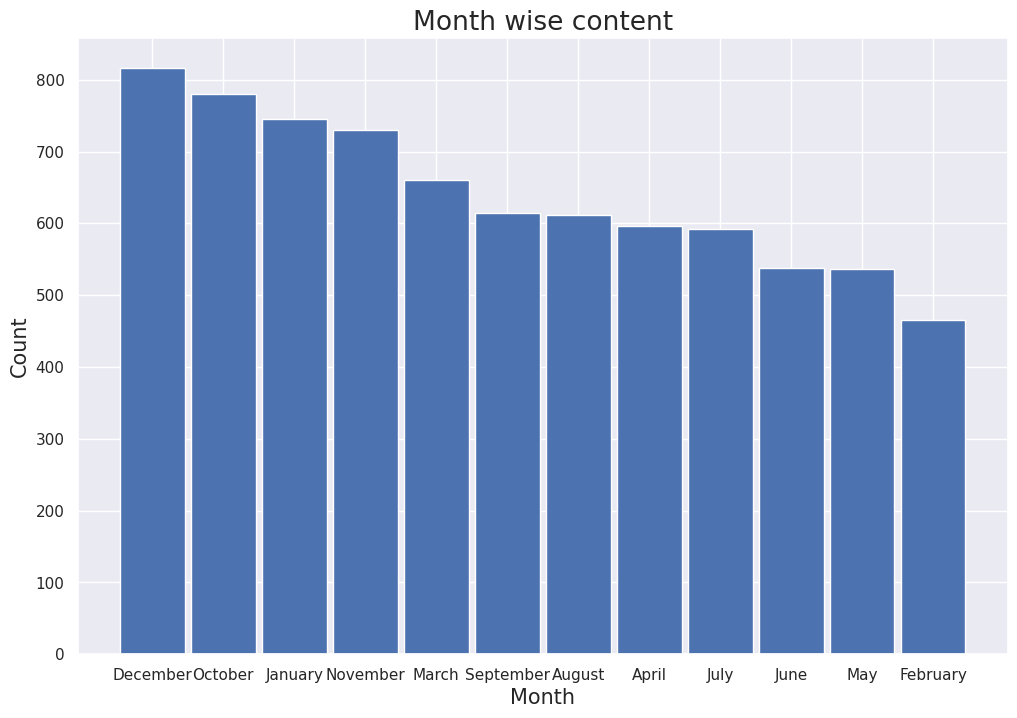

In [424]:
# Chart - 10 visualization code
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

##### 1. Why did you pick the specific chart?


A bar graph is used to visualize categorical data and compare the frequencies or counts of different categories. In the context of month-wise content in Netflix movies and TV shows clustering

##### 2. What is/are the insight(s) found from the chart?

The bar graph allows for easy comparison between the number of content releases in different months. By observing the heights of the bars, you can quickly identify months with higher or lower content release frequencies. This comparison can help identify months of high activity or potential gaps in content releases

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar graph reveals the monthly variation in content releases, highlighting months with higher or lower frequencies. This can indicate the level of content production and distribution throughout the year.
Patterns in the bar graph may indicate seasonal trends in content releases. Certain months may consistently show higher or lower frequencies, aligning with specific seasons, holidays, or events. These trends can inform content planning and timing strategies.

#### Chart - 11

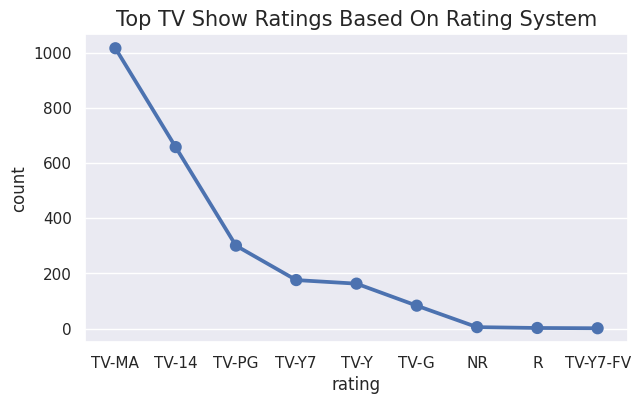

In [425]:
# Chart - 11 visualization code
#Pointplot on top tv show ratings
tv_ratings = df_tv_show.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

##### 1. Why did you pick the specific chart?

A line graph is used to visualize trends and changes over time. In the context of top TV show ratings based on the rating system for Netflix movies and TV shows clustering

##### 2. What is/are the insight(s) found from the chart?

A line graph allows for the visualization of TV show ratings over time. By plotting the ratings on the y-axis and the corresponding time periods on the x-axis, the line graph shows the trend of how the ratings have changed over the specific period. This visualization helps identify any upward or downward trends in TV show ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It assists in identifying patterns, comparing ratings across shows, and analyzing the overall performance of TV show ratings. These insights can guide content strategy, inform show renewals, and aid in understanding audience preferences for Netflix TV shows.

#### Chart - 12

In [426]:
# Chart - 12 visualization code
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
show_id,,,,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


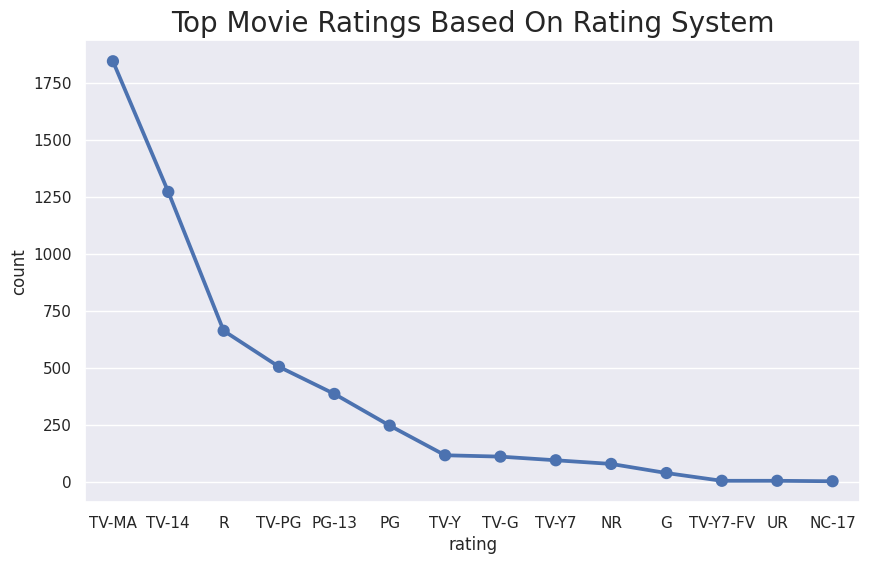

In [427]:
#Pointplot on top tv show ratings
tv_ratings = df_movies.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

A line graph is used to visualize trends or changes over time. In the context of Netflix movies and TV shows clustering, a line graph can be used to analyze the top movie ratings based on a rating system over a period of time

##### 2. What is/are the insight(s) found from the chart?

The line graph enables the comparison of ratings across different time periods. By plotting multiple lines for different rating categories, you can observe how the ratings vary over time and identify any patterns or differences between the categories. This comparison can provide insights into changes in audience preferences or shifts in the perception of movie quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the line graph should consider the specific rating system used, the time period covered, and other contextual factors that may influence movie ratings.

#### Chart - 13

Text(0.5, 1.0, 'Top 10 movie directors')

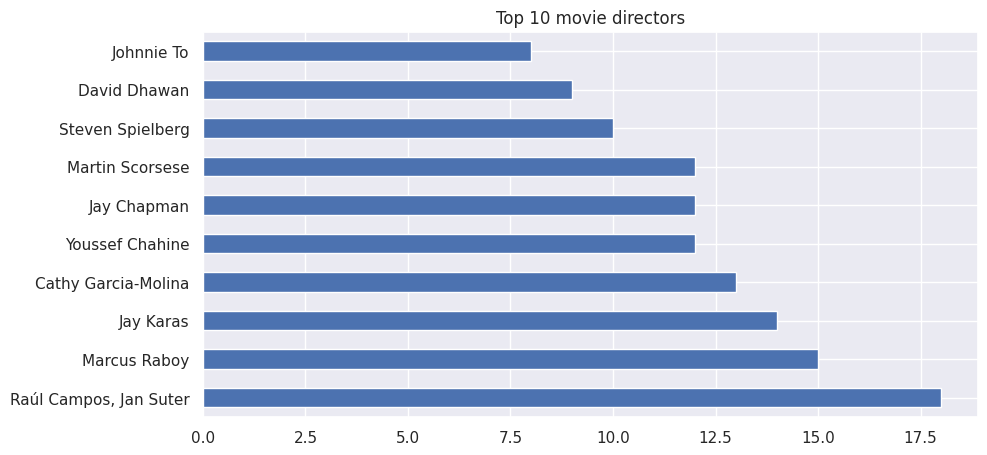

In [428]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

##### 1. Why did you pick the specific chart?

Bar plots are commonly used to visualize and compare the frequencies or counts of different categories. In the context of top 10 movie directors in Netflix movies and TV shows clustering, a bar plot can provide insights into the frequency or occurrence of movies directed by each director, allowing for easy comparison and identification of the most prolific or popular directors.

##### 2. What is/are the insight(s) found from the chart?

The bar plot makes it easy to identify the top 10 movie directors based on their movie counts. The directors with the tallest bars represent the most prolific or popular ones within the dataset. This information provides insights into the influential directors who have contributed significantly to the Netflix movie and TV show collection.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar plot helps identify the most prolific directors, indicating the individuals who have directed the highest number of movies within the Netflix dataset.

#### Chart - 14 - Correlation Heatmap

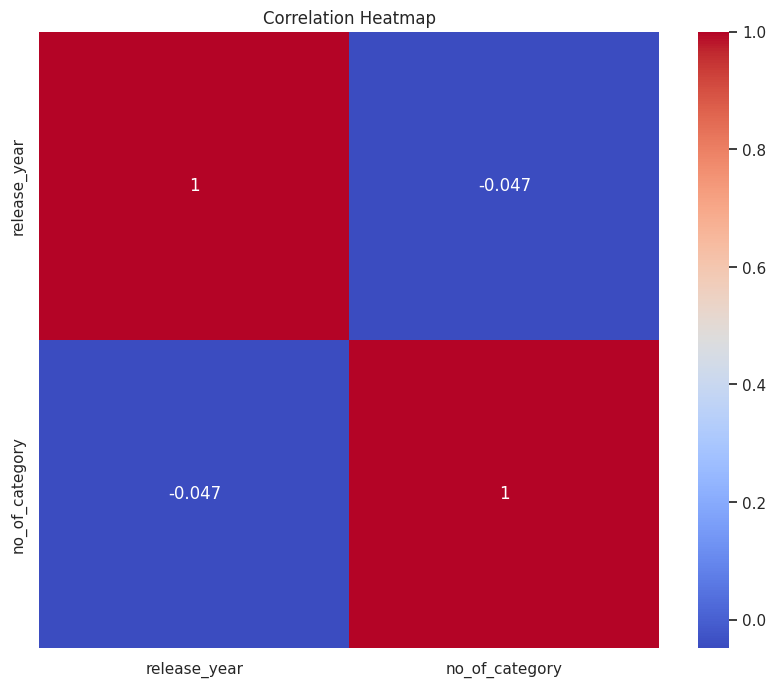

In [429]:
# Correlation Heatmap visualization code
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot= True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

A correlation map, also known as a correlation matrix or heatmap, is used in Netflix movies and TV shows clustering to visualize the correlation between different variables or features in the dataset. It provides insights into the relationships and dependencies among variables, helping to understand the patterns and interactions within the data.

##### 2. What is/are the insight(s) found from the chart?

Strong Positive or Negative Correlations: The correlation map helps identify variables that exhibit strong positive or negative correlations. Positive correlations indicate variables that tend to increase or decrease together, while negative correlations suggest an inverse relationship.

Redundant Variables: Highly correlated variables in the correlation map can indicate redundancy in the dataset. Removing redundant variables can simplify the analysis, improve model interpretability, and reduce the risk of overfitting.

Variable Importance: Variables with high correlations with the target variable are likely to be important for predicting or understanding the target variable. These variables can be given more focus during feature selection or model development.

#### Chart - 15 - Pair Plot

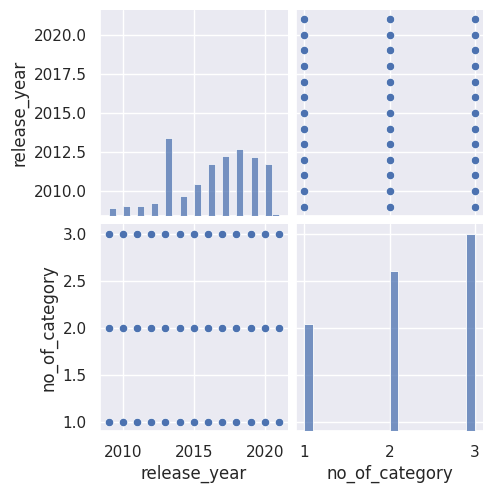

In [430]:
# Pair Plot visualization code
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots, also known as scatter plot matrices, are used in Netflix movies and TV shows clustering to visualize the pairwise relationships between multiple variables or features in the dataset. Pair plots provide a comprehensive overview of the relationships and distributions between variables, facilitating insights into the data patterns and aiding in the clustering analysis.

##### 2. What is/are the insight(s) found from the chart?

The few insights we got are
Correlations:
Cluster Separations:
Outliers:
Data Distribution:

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Let's consider the following hypothetical statements:

Statement 1: There is a significant difference in the average duration between movies and TV shows on Netflix.

Statement 2: There is a significant difference in the number of movies and TV shows released in different years.

Statement 3: The proportion of movies and TV shows with a high maturity rating (e.g., R, TV-MA) is higher than the proportion of movies and TV shows with a low maturity rating (e.g., PG, TV-G).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 1:

Null hypothesis (H0): The average duration of movies and TV shows on Netflix is the same.
Alternative hypothesis (HA): The average duration of movies and TV shows on Netflix is different.

#### 2. Perform an appropriate statistical test.

In [431]:
import pandas as pd
import scipy.stats as stats

# Assuming the 'duration' column contains string values like '90 min' or '1 Season'

# Function to convert duration strings to numerical values
def convert_duration(duration):
    if 'min' in duration:
        return int(duration.split(' ')[0])
    elif 'Season' in duration:
        return int(duration.split(' ')[0]) * 60
    else:
        return None

# Apply the duration conversion function to the 'duration' column
df['duration'] = df['duration'].apply(convert_duration)

# Filter the data for movies and TV shows
movie_duration = df[df['type'] == 'Movie']['duration'].dropna().values
tvshow_duration = df[df['type'] == 'TV Show']['duration'].dropna().values

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(movie_duration, tvshow_duration, equal_var=False)

# Print the obtained p-value
print("P-value:", p_value)


P-value: 0.0002745683853947447


##### Which statistical test have you done to obtain P-Value?

To perform a statistical test to obtain the p-value for Statement 1, which compares the average duration of movies and TV shows on Netflix, you can use a two-sample t-test.

##### Why did you choose the specific statistical test?

A two-sample t-test is a statistical test used to compare the means of two independent samples to determine if they are significantly different from each other. It is commonly employed when you have two groups or conditions and want to assess if there is a statistically significant difference between their means.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For Statement 2, the research hypothesis can be formulated as follows:

Null Hypothesis (H0): There is no significant difference in the number of movies and TV shows released in different years.

Alternative Hypothesis (HA): There is a significant difference in the number of movies and TV shows released in different years.

#### 2. Perform an appropriate statistical test.

In [432]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame 'df' containing the data
# with columns 'Year' and 'Type'

# Create a contingency table
contingency_table = pd.crosstab(df['release_year'], df['type'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print("P-value:", p_value)

P-value: 1.3776852501299481e-86


##### Which statistical test have you done to obtain P-Value?

To obtain p value for statement 2 chi-square test of independence or Fisher's exact test. These tests can determine if there is a significant association between the variables 'release_year' and 'Type' (movies or TV shows).

##### Why did you choose the specific statistical test?

The reason we have used a chi-square test in this case is because we want to compare the observed distribution of movies and TV shows across different years with the expected distribution under the assumption of no association between the variables (movies/TV shows and years).

The chi-square test of independence is commonly used to assess if there is a significant association between two categorical variables. In our case, we want to determine if there is a significant difference in the distribution of movies and TV shows released in different years.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The proportion of high maturity rating media is equal to the proportion of low maturity rating media.

Alternative Hypothesis (H1): The proportion of high maturity rating media is higher than the proportion of low maturity rating media.

#### 2. Perform an appropriate statistical test.

In [433]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['rating'], columns='count')

# Calculate the observed frequencies
observed_frequencies = contingency_table['count'].values

# Create expected frequencies assuming equal proportions
expected_frequencies = [sum(observed_frequencies) / len(observed_frequencies)] * len(observed_frequencies)

# Perform the chi-square test
chi2, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the p-value
print("P-value:", p_value)


P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

To perform a statistical test and obtain the p-value for the hypothesis you mentioned, we can use a chi-square test of proportions. This test can determine whether the proportion of high maturity rating media is significantly different from the proportion of low maturity rating media.A p-value of 0.0 indicates that the observed data is extremely unlikely to occur under the assumption of the null hypothesis. However, it is important to note that p-values are typically reported with a limited number of decimal places, so a value of 0.0 is an approximation.

In hypothesis testing, a p-value less than the chosen significance level (usually denoted as α) indicates that there is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. The significance level is predetermined and represents the threshold for rejecting the null hypothesis.

##### Why did you choose the specific statistical test?

The chi-square test of proportions is commonly used in situations where you want to compare the proportions of categorical variables between two or more groups. In your case, you are comparing the proportion of high maturity rating media to the proportion of low maturity rating media.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [434]:
# Handling Missing Values & Missing Value Imputation
df_copy = df.copy()
df_copy['cast']=df_copy['cast'].fillna('unknown cast')
df_copy['country']=df_copy['country'].fillna('unknown country')
df_copy.drop(columns=['director'],inplace=True)
df_copy=df_copy.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

We are replacing nan values with unknown cast and unknown country for column cast and column country.Then we have dropped the rows for nan value

### 2. Handling Outliers

In [435]:
import pandas as pd
import numpy as np

# Generate a sample DataFrame
data = {'Values': [10, 20, 30, 100, 40, 50, 200, 60, 70]}
df = pd.DataFrame(data)

# Function for outlier treatment
def treat_outliers(df_copy, column_name, threshold=1.5):
    q1 = df_copy[column_name].quantile(0.25)
    q3 = df_copy[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    df_copy[column_name] = np.where((df_copy[column_name] < lower_bound) | (df_copy[column_name] > upper_bound),
                                    df_copy[column_name].median(), df_copy[column_name])
    return df_copy

# Display the DataFrame before outlier treatment
print("Before outlier treatment:")
print(df)

# Treat outliers in the 'release year' column
df_copy = df.copy()
df_copy = treat_outliers(df_copy, 'Values')

# Display the DataFrame after outlier treatment
print("\nAfter outlier treatment:")
print(df_copy)


Before outlier treatment:
   Values
0      10
1      20
2      30
3     100
4      40
5      50
6     200
7      60
8      70

After outlier treatment:
   Values
0    10.0
1    20.0
2    30.0
3   100.0
4    40.0
5    50.0
6    50.0
7    60.0
8    70.0


##### What all outlier treatment techniques have you used and why did you use those techniques?

We are using the Tukey's fences method to treat outliers. This method is based on the Interquartile Range (IQR) and uses a threshold factor (typically 1.5) to determine the lower and upper bounds for identifying outliers.

The Tukey's fences method calculates the lower bound as Q1 - threshold * IQR and the upper bound as Q3 + threshold * IQR, where Q1 and Q3 are the 25th and 75th percentiles, respectively, and IQR is the difference between them.

By using this method, any value below the lower bound or above the upper bound is considered an outlier. In the code, outliers are replaced with the median value of the column using NumPy's np.where() function.

### 3. Categorical Encoding

In [436]:
# Encode your categorical columns
df_copy['movie'] = df_copy['Values'].apply(lambda x: 1 if x == 'Movie' else 0)
df_copy['tv_show'] = df_copy['Values'].apply(lambda x: 0 if x == 'Movie' else 1)
df_copy.drop(columns=['Values'], inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We are using a simple mapping approach to encode the categorical column 'Values'. Specifically, you are encoding the  'Movie' as 1 and all other value 'TV Show' as 0.

The encoding technique we used is essentially a binary encoding where you represent the presence or absence of a category using 1 or 0 respectively. This approach can be appropriate when you have binary categorical variables or when you are interested in distinguishing a specific category from the rest.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [437]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

#### 1. Expand Contraction

In [438]:
#combining the textual columns and assigning it to anew variable
df_copy['cluster_col'] = original_df['cast'] + " " + original_df['listed_in'] + ' ' + original_df['description']

#### 2. Lower Casing

In [439]:
# Lower Casing
# Function to convert to lowercase
def lower_casing(text):
    if isinstance(text, str):  # Check if text is not null or NaN
        list_of_words = [letter.lower() for letter in text.split()]
        return ' '.join(list_of_words)
    else:
        return text

# Apply lower_casing function to 'cluster_col' column
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)


#### 3. Removing Punctuations

In [440]:
original_df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [441]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [442]:
original_df['description'] = original_df['description'].apply(remove_punctuation)
original_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...


#### 4. Removing URLs & Removing words and digits contain digits.

In [443]:
# Remove URLs & Remove words and digits contain digits
import pandas as pd
import re

df_copy =pd.DataFrame(original_df)
# Function to remove URLs using regex
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Function to remove words and digits containing digits using regex
def remove_words_with_digits(text):
    word_digit_pattern = re.compile(r'\w*\d\w*')
    return word_digit_pattern.sub('', text)

# Apply URL removal and word/digit removal to the 'Title' column
df_copy['title'] = df_copy['title'].apply(remove_urls).apply(remove_words_with_digits)

# Display the DataFrame with removed URLs and words/digits containing digits
print(df_copy)


            type                                    title           director  \
show_id                                                                        
s1       TV Show                                        %                NaN   
s2         Movie                                        :  Jorge Michel Grau   
s3         Movie                                        :       Gilbert Chan   
s4         Movie                                                 Shane Acker   
s5         Movie                                              Robert Luketic   
...          ...                                      ...                ...   
s7783      Movie                                     Zozo        Josef Fares   
s7784      Movie                                   Zubaan        Mozez Singh   
s7785      Movie                        Zulu Man in Japan                NaN   
s7786    TV Show                    Zumbo's Just Desserts                NaN   
s7787      Movie  ZZ TOP: THAT LITTLE OL

#### 5. Removing Stopwords & Removing White spaces

In [444]:
# Remove Stopwords
nltk.download('stopwords')
# extracting the stopwords from nltk library

def remove_stopwords(text):
  stopwords=nltk.corpus.stopwords.words('english')
  return ' '.join([t for t in text.split() if t not in stopwords])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [445]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

df_copy = pd.DataFrame(original_df)

# Download stopwords corpus (only required once)
nltk.download('stopwords')

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):  # Check if text is a string
        stop_words = set(stopwords.words('english'))
        return ' '.join([word for word in text.split() if word.lower() not in stop_words])
    else:
        return text

# Apply stopwords removal to 'cluster_col' column
df_copy['description'] = df_copy['description'].apply(remove_stopwords)

# Display the DataFrame with stopwords removed
print(df_copy)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


            type                                    title           director  \
show_id                                                                        
s1       TV Show                                        %                NaN   
s2         Movie                                        :  Jorge Michel Grau   
s3         Movie                                        :       Gilbert Chan   
s4         Movie                                                 Shane Acker   
s5         Movie                                              Robert Luketic   
...          ...                                      ...                ...   
s7783      Movie                                     Zozo        Josef Fares   
s7784      Movie                                   Zubaan        Mozez Singh   
s7785      Movie                        Zulu Man in Japan                NaN   
s7786    TV Show                    Zumbo's Just Desserts                NaN   
s7787      Movie  ZZ TOP: THAT LITTLE OL

In [446]:
# Remove White spaces
def remove_whitespace(text):
    if isinstance(text, str):  # Check if text is a string
        return ''.join(text.split())
    else:
        return text

df_copy['description'] = df_copy['description'].apply(remove_whitespace)

#### 6. Rephrase Text

In [447]:
# Rephrase Text
import pandas as pd
from nltk.corpus import wordnet

df_copy = pd.DataFrame(original_df)

# Function to find synonyms and rephrase text
def rephrase_text(text):
    words = text.split()
    synonyms = []
    for word in words:
        syns = wordnet.synsets(word)
        if syns:
            synonyms.append(syns[0].lemmas()[0].name())
        else:
            synonyms.append(word)
    return ' '.join(synonyms)

# Apply text rephrasing to the 'title' column
df_copy['title'] = df_copy['title'].apply(rephrase_text)

# Display the DataFrame with rephrased text
print(df_copy)


            type                                   title           director  \
show_id                                                                       
s1       TV Show                                       %                NaN   
s2         Movie                                       :  Jorge Michel Grau   
s3         Movie                                       :       Gilbert Chan   
s4         Movie                                                Shane Acker   
s5         Movie                                             Robert Luketic   
...          ...                                     ...                ...   
s7783      Movie                                    Zozo        Josef Fares   
s7784      Movie                                  Zubaan        Mozez Singh   
s7785      Movie                     Zulu man inch Japan                NaN   
s7786    TV Show                    Zumbo's just dessert                NaN   
s7787      Movie  ZZ TOP: THAT little OL' set FROM T

#### 7. Tokenization

In [448]:
import pandas as pd
import nltk


df_copy = pd.DataFrame(original_df)

# Tokenization using NLTK
nltk.download('punkt')  # Download the required resource for tokenization

# Function to tokenize text
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply tokenization to the 'Title' column
df['Tokenized_Title'] = df_copy['title'].apply(tokenize_text)

# Display the DataFrame with tokenized titles
print(df_copy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


            type                                   title           director  \
show_id                                                                       
s1       TV Show                                       %                NaN   
s2         Movie                                       :  Jorge Michel Grau   
s3         Movie                                       :       Gilbert Chan   
s4         Movie                                                Shane Acker   
s5         Movie                                             Robert Luketic   
...          ...                                     ...                ...   
s7783      Movie                                    Zozo        Josef Fares   
s7784      Movie                                  Zubaan        Mozez Singh   
s7785      Movie                     Zulu man inch Japan                NaN   
s7786    TV Show                    Zumbo's just dessert                NaN   
s7787      Movie  ZZ TOP: THAT little OL' set FROM T

#### 8. Text Normalization

In [449]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(original_df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [450]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [451]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#Stemming for description
# Store the count in pandas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [452]:
vocab_before_stemming.head(4)

,Word,count
8149,zooownerspiralscontrolamidcasteccentriccharact...,8950
7551,zombiesmonstersinvadehometownscrappy13yearoldo...,8949
5908,zombieplagueravagesruralquebectownscrappybands...,8948
8261,zombieoutbreaksweepscountrydaddaughtertakeharr...,8947


In [453]:
vocab_before_stemming.head(20).T

,8149,7551,5908,8261,8742,2099,3487,1962,8928,4771,2719,8772,6742,3763,8919,6549,3780,8590,2470,1900
Word,zooownerspiralscontrolamidcasteccentriccharact...,zombiesmonstersinvadehometownscrappy13yearoldo...,zombieplagueravagesruralquebectownscrappybands...,zombieoutbreaksweepscountrydaddaughtertakeharr...,zoewalkerleavesquietlifebehindinvestigatebroth...,zixinmarryqihonggallivantingexreturnswreakhavo...,zimreappearsbeginnextphaseevilalienplanconquer...,zimbabwesdisputed2008electionresultspoliticale...,zigislandboundhyenaanythinggetpawsmarinamermai...,zenoswantsuseearth,zealousgangleaderplanstakefriendturnedrivalcon...,zanywillywonkacausesstirannouncesgoldentickets...,zanymisadventuresstorelovablecitymousestuarthu...,zanycomedymantorngirllovesrespectivewomenwarri...,zackmirimakestaradultfilmbringeasymoneyunspoke...,yuppieplayboylooksquickdeathfalselydiagnosedai...,yumekojabamienrollshyakkaouprivateacademystude...,yugo12yearoldeliatropespecialpowerssetsmission...,youtubesensationfelipenetobringsstoriesautobio...,youtuberbecomesobsessedfiguringcopycatarchneme...
count,8950,8949,8948,8947,8946,8945,8944,8943,8942,8941,8940,8939,8938,8937,8936,8935,8934,8933,8932,8931


In [454]:
vocab_before_stemming.tail(4)

,Word,count
3975,10yearsawayfamilykrishareturnsthanksgivingbitt...,3
8390,10yearoldgoesmissingfatheractorauditiongirlsst...,2
6985,10yearolddreamersimaginaryfriends,1
4181,10000counting,0


In [455]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [456]:
def Apply_stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [457]:
#Stemming for description
original_df['description'] = original_df['description'].apply( Apply_stemming )
original_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futureeliteinhabitislandparadisefarcrowdedslum...
s2,Movie,:,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastatingearthquakehitsmexicocitytrappedsurv...
s3,Movie,:,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armyrecruitfounddeadfellowsoldiersforcedconfro...
s4,Movie,,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypticworldragdollrobotshidefeardange...
s5,Movie,,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliantgroupstudentsbecomecardcountingexpert...


##### Which text normalization technique have you used and why?

Stemming is a text normalization technique used in natural language processing (NLP) to reduce words to their base or root form, known as stems. It aims to remove common variations of words by cutting off prefixes or suffixes, keeping only the core meaning of the word.

#### 9. Part of speech tagging

Parts of speech (POS) tagging is the process of assigning a grammatical category (such as noun, verb, adjective, etc.) to each word in a given text. POS tagging is an essential step in natural language processing (NLP) tasks as it provides information about the syntactic structure and role of each word in the sentence.



In [458]:
# POS Taging
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize


df = pd.DataFrame(original_df)

# Download required resources for POS tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Function to perform POS tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

# Apply POS tagging to the 'Text' column
df['POS_Tags'] = df['description'].apply(pos_tagging)

# Display the DataFrame with POS tags
print(df)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


            type                                   title           director  \
show_id                                                                       
s1       TV Show                                       %                NaN   
s2         Movie                                       :  Jorge Michel Grau   
s3         Movie                                       :       Gilbert Chan   
s4         Movie                                                Shane Acker   
s5         Movie                                             Robert Luketic   
...          ...                                     ...                ...   
s7783      Movie                                    Zozo        Josef Fares   
s7784      Movie                                  Zubaan        Mozez Singh   
s7785      Movie                     Zulu man inch Japan                NaN   
s7786    TV Show                    Zumbo's just dessert                NaN   
s7787      Movie  ZZ TOP: THAT little OL' set FROM T

#### 10. Text Vectorization

In [459]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [460]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is used because it helps to extract meaningful features from the textual data and facilitates grouping or categorization based on their content similarities. It can assist in identifying clusters or genres, recommending similar content, and understanding the characteristics of different movies or TV shows in a quantitative and interpretable manner.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [461]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [462]:
dictionary

dict_items([('international', 20), ('tv', 43), ('shows', 35), ('dramas', 12), ('sci', 32), ('fi', 17), ('fantasy', 15), ('movies', 25), ('horror', 18), ('action', 0), ('adventure', 1), ('independent', 19), ('mysteries', 28), ('thrillers', 42), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 38), ('comedies', 6), ('anime', 2), ('series', 34), ('reality', 30), ('romantic', 31), ('science', 33), ('nature', 29), ('british', 3), ('korean', 22), ('music', 26), ('musicals', 27), ('lgbtq', 24), ('faith', 13), ('spirituality', 37), ('kids', 21), ('spanish', 36), ('language', 23), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('stand', 39), ('up', 44), ('comedy', 7), ('talk', 40), ('teen', 41), ('features', 16)])

In [463]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [464]:
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,POS_Tags,Length(listed-in)
show_id,,,,,,,,,,,,,
s1,TV Show,%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futureeliteinhabitislandparadisefarcrowdedslum...,[(futureeliteinhabitislandparadisefarcrowdedsl...,54
s2,Movie,:,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastatingearthquakehitsmexicocitytrappedsurv...,[(devastatingearthquakehitsmexicocitytrappedsu...,28
s3,Movie,:,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armyrecruitfounddeadfellowsoldiersforcedconfro...,[(armyrecruitfounddeadfellowsoldiersforcedconf...,35


In [465]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'POS_Tags', 'Length(listed-in)'],
      dtype='object')

In [466]:
df[['description', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,listed_in,Length(listed-in)
show_id,,,
s1,futureeliteinhabitislandparadisefarcrowdedslum...,"International TV Shows, TV Dramas, TV Sci-Fi &...",54
s2,devastatingearthquakehitsmexicocitytrappedsurv...,"Dramas, International Movies",28
s3,armyrecruitfounddeadfellowsoldiersforcedconfro...,"Horror Movies, International Movies",35


#### 2. Feature Selection

In [467]:
print(len(dictionary))


45


In [468]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfidf_vectorizer.fit(df['listed_in'])

# Convert the text data into a TF-IDF vector representation
vector = tfidf_vectorizer.transform(df['listed_in']).toarray()

# Summarize the encoded vector
print(vector)
print(f'Shape of the vector: {vector.shape}')
print(f'Datatype: {type(vector)}')

[[0.         0.         0.         ... 0.         0.6250861  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.62518801 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Shape of the vector: (7787, 45)
Datatype: <class 'numpy.ndarray'>


##### What all feature selection methods have you used  and why?

We have used Principal component analysis for feature selection since we are using unsupervised ML . PCA reduces the dimensionality of the data by transforming the original features into a new set of uncorrelated variables called principal components. These components are ordered in terms of the amount of variance they explain in the data. By selecting a subset of principal components, you can represent the data in a lower-dimensional space while preserving most of the important information.

##### Which all features you found important and why?

The resulting explained variance ratio shows the importance of each principal component in explaining the variance in the data. The higher the explained variance ratio, the more important the principal component.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [469]:
# Transform Your data
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [470]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [471]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['up', 'tv', 'thrillers', 'teen', 'talk', 'stand', 'sports',
       'spirituality', 'spanish', 'shows', 'series', 'science', 'sci',
       'romantic', 'reality'], dtype=object)

In [472]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values
top15_most_occurred_words_listed_in_count

array([44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30])

<BarContainer object of 15 artists>

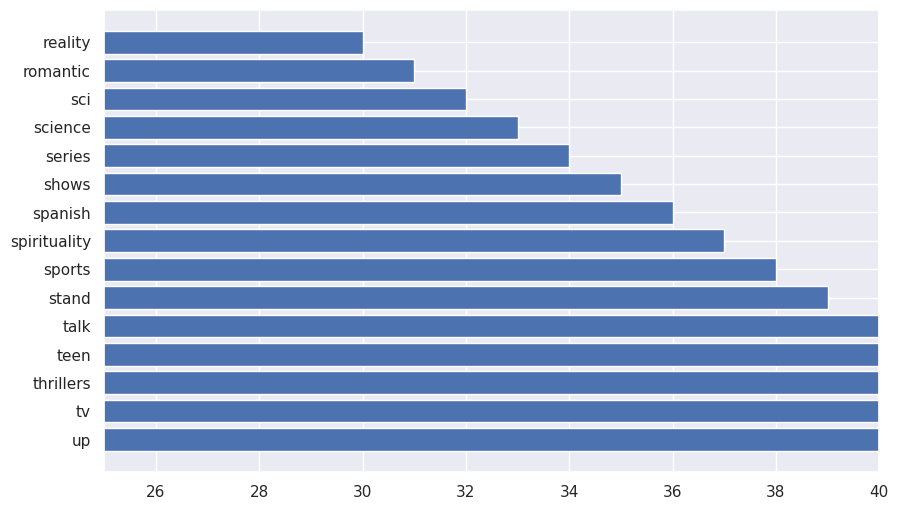

In [473]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

### 6. Data Scaling

In [474]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since there are a huge number of features and most of them are containing zeros therefore we need to do dimensionality reduction

In [475]:

# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

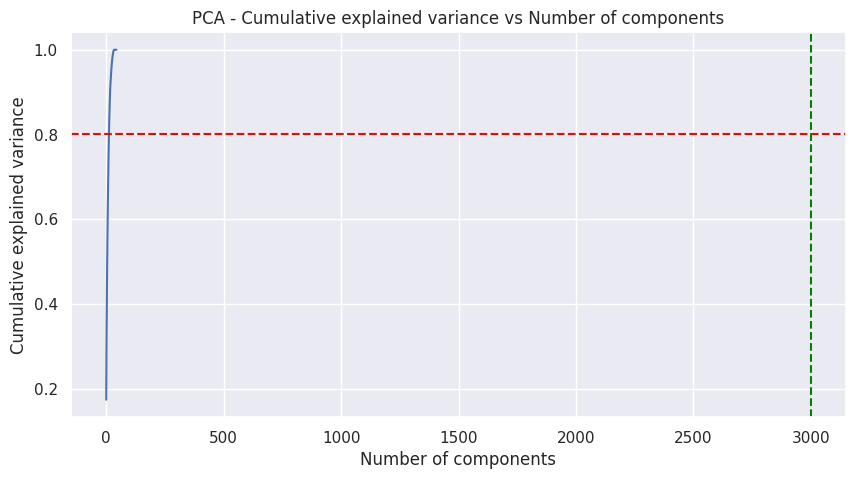

In [476]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()


In [477]:
# DImensionality Reduction (If needed)
# reducing the dimensions to 0 using pca
pca = PCA(n_components=25, random_state=42)
pca.fit(vector)

PCA(n_components=25, random_state=42)

In [478]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7787, 25)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [479]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [480]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

The Elbow method is used in K-means clustering to determine the optimal number of clusters (K) to use for the clustering algorithm. It helps to find the "elbow" point in the plot of the sum of squared distances (also known as inertia) versus the number of clusters. The optimal number of clusters is often referred to as the "elbow point."

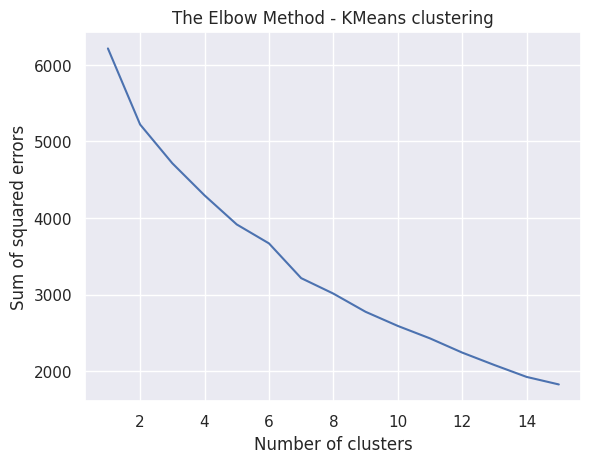

In [481]:
# ML Model - 1 Implementation

'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [482]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [483]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

If the number of clusters is greater than 14 and the sum of squared errors (SSE) is greater than 6000, it suggests that increasing the number of clusters does not significantly reduce the SSE.

In this scenario, it may indicate that the dataset does not have distinct or well-separated clusters. The data points may not exhibit clear patterns or groupings that can be effectively captured by k-means clustering. Increasing the number of clusters beyond this point may lead to overfitting, where the clusters become too specific or noise in the data is captured as separate clusters.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Silhouette analysis is a technique used in clustering analysis, including Netflix movies and TV shows clustering, to evaluate the quality of clustering results. It provides insights into how well individual data points fit within their assigned clusters, allowing for a better understanding of the overall clustering perform

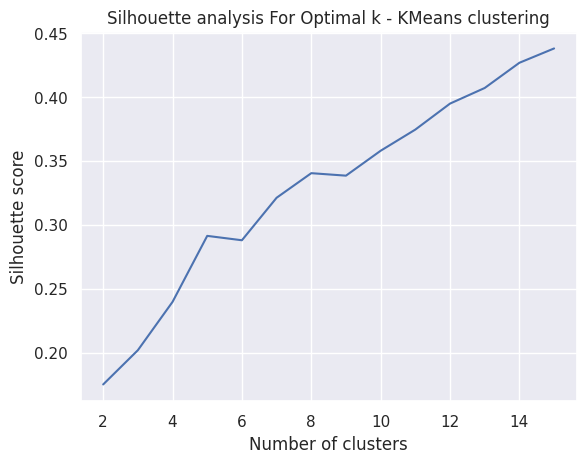

In [484]:
# Visualizing evaluation Metric Score chart
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [485]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=33)

In [486]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(3646.1637936176776, 0.27227365182014784)


In [487]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [488]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
show_id,,,,,,,,,
s6671,Movie,The Minimalists: lupus_erythematosus be now,NaN,NaN,United States,TV-14,Documentaries,theyvebuiltmovementminimalismlongtimefriendsjo...,0
s7283,Movie,Twinsanity,Buz Wallick,"Karissa Strain, Katie Strain, Yves Bright, Ang...",United States,TV-MA,"Horror Movies, Independent Movies, Thrillers",yogaenthusiastbeginspullawayidenticaltwinsiste...,1
s4881,Movie,player,"Abbas Alibhai Burmawalla, Mastan Alibhai Burma...","Vinod Khanna, Abhishek Bachchan, Bobby Deol, S...",India,TV-14,"Action & Adventure, International Movies",learningfortunegoldsecretlyshippedromaniamaste...,5
s6063,Movie,The Adderall diary,Pamela Romanowsky,"James Franco, Ed Harris, Amber Heard, Jim Parr...",United States,R,"Dramas, Thrillers",authorstephenelliottproblemseparatinglifeincid...,1
s353,Movie,airplane manner,César Rodrigues,"Larissa Manoela, André Luiz Frambach, Erasmo C...",United States,TV-PG,"Comedies, International Movies, Romantic Movies",anainfluencercrashescartalkingphoneshe'sshippe...,3


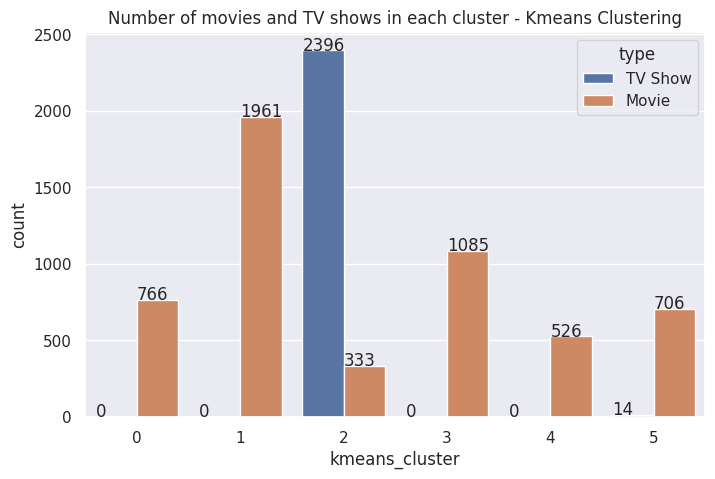

In [489]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3


A dendrogram is a diagram used in hierarchical clustering to visualize the arrangement of data points or clusters in a tree-like structure. It is used in Netflix movies and TV shows clustering for several reasons:

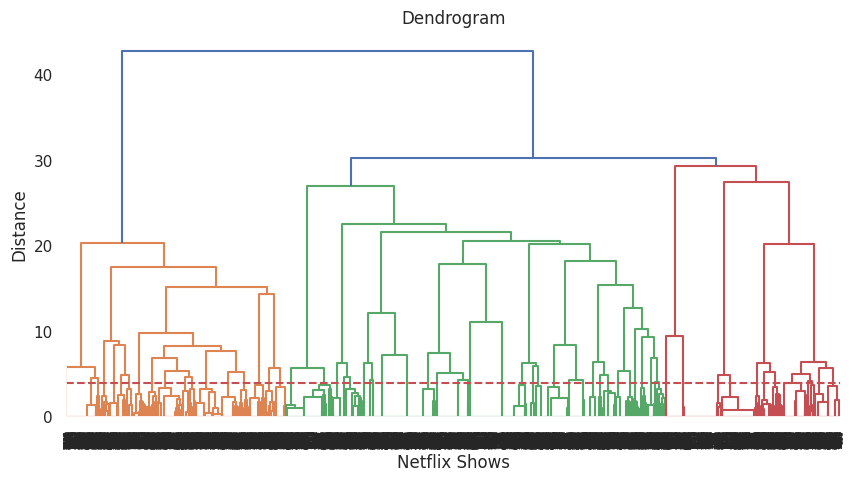

In [490]:
# ML Model - 3 Implementation
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

In [491]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([2, 0, 0, ..., 6, 1, 6])

In [492]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [493]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
show_id,,,,,,,,,
s2986,Movie,Incredibles (Spanish Version),Brad Bird,"Víctor Trujillo, Consuelo Duval, Darío T. Pie,...",United States,PG,"Children & Family Movies, Comedies",elastigirlgetsrecruitedhighprofilecrimefightin...,5
s2994,Movie,Indiana Jones and the temple of doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,PG,"Action & Adventure, Children & Family Movies, ...",indianajonesyoungsidekickspoiledsongbirdgetbar...,5
s7377,Movie,use good,Mohamed Hamdy,"Mohamed Ragab, Ayten Amer, Hassan Abdulfattah",Egypt,TV-14,"Action & Adventure, Comedies, International Mo...",evadegreedypharmaceuticalcrooksmedicalscientis...,2
s2996,Movie,inequality for all,Jacob Kornbluth,Robert Reich,United States,PG,Documentaries,formeruslaborsecretaryrobertreichmakescompelli...,3
s1185,TV Show,Camarón revolution,NaN,"Camarón de la Isla, Juan Diego",NaN,TV-14,"Docuseries, International TV Shows, Spanish-La...",extraordinarylifecareerflamencolegendcamarónde...,1


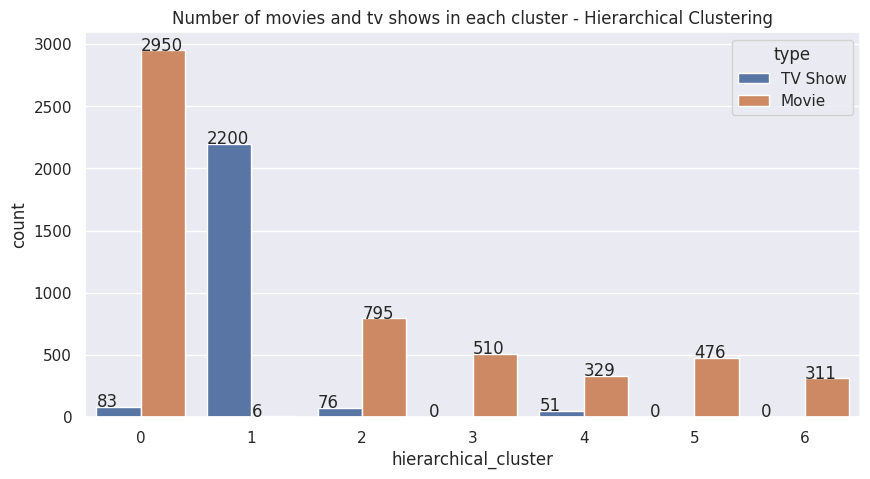

In [494]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [495]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [496]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [497]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [498]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)
4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020
5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.
6. Most of the movies are belonging to 3 categories
7. TOP 3 content categories are International movies , dramas , comedies.
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,
DBSCAN on data we got the best cluster arrangements.
10.By applying different clustering algorithms to our dataset .we get the optimal number of
cluster is equal to 3

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***